In [1]:
#!pip install transformers
#!unzip data.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from transformers import BertTokenizer, BertConfig, TFBertForSequenceClassification
import tensorflow as tf

from sklearn.model_selection import train_test_split

pd.options.display.max_colwidth = None
%matplotlib inline

C:\Users\JorgeMauricioArancib\anaconda3\envs\envNLPTensorFlowGPU\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#modelo transformer a utilizar
nombre_modelo = 'bert-base-multilingual-uncased'

In [4]:
sent_list = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
sent_list

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

## Limpieza de datos

In [5]:
import re, string

pattern1 = re.compile(r'@[\w_]+') #elimina menciones
pattern2 = re.compile(r'https?://[\w_./]+') #elimina URL
pattern3 = re.compile(r'#[\w_]+') #elimina hashtags
pattern4 = re.compile('[{}]+'.format(re.escape(string.punctuation))) #elimina símbolos de puntuación

def clean_text(text):
    """Limpiamos las menciones, URL y hashtags del texto. Luego 
    quitamos signos de puntuación"""
    text = pattern1.sub('mención', text)
    text = pattern2.sub('URL', text)
    text = pattern3.sub('hashtag', text)
    text = pattern4.sub(' ', text)
    
    return text

## Fine Tunning con BERT

In [6]:
#definimos modelo de clasificación
config = BertConfig.from_pretrained(nombre_modelo, hidden_dropout_prob=0.1, num_labels=2)
model = TFBertForSequenceClassification.from_pretrained(nombre_modelo, config=config)
model.bert.trainable = True #Forzamos a entrenar, puesto que congelando no aprende el modelo

# recommended learning rate for Adam 5e-5, 3e-5, 2e-5

learning_rate = 2e-5

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.summary()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  167356416 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 167,357,954
Trainable params: 167,357,954
Non-trainable params: 0
_________________________________________________________________


--------------------TRAINING SENTIMENT: anger---------------------
Epoch 1/5
312/312 [==============================] - 79s 195ms/step - loss: 0.6151 - accuracy: 0.6874 - val_loss: 0.5682 - val_accuracy: 0.7287
Epoch 2/5
312/312 [==============================] - 58s 186ms/step - loss: 0.5169 - accuracy: 0.7665 - val_loss: 0.5068 - val_accuracy: 0.7689
Epoch 3/5
312/312 [==============================] - 58s 187ms/step - loss: 0.3949 - accuracy: 0.8291 - val_loss: 0.5565 - val_accuracy: 0.7334
Epoch 4/5
312/312 [==============================] - 59s 188ms/step - loss: 0.2741 - accuracy: 0.8913 - val_loss: 0.5980 - val_accuracy: 0.7465
Epoch 5/5
312/312 [==============================] - 58s 188ms/step - loss: 0.2061 - accuracy: 0.9205 - val_loss: 0.8725 - val_accuracy: 0.6801


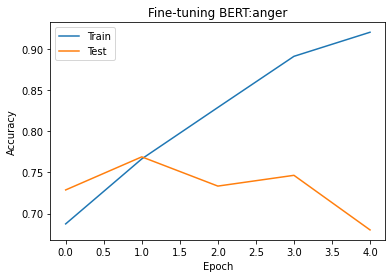

134/134 - 7s - loss: 0.8725 - accuracy: 0.6801 - 7s/epoch - 50ms/step
Evaluacion Modelo Sentimiento: anger
score: 0.87
acc: 0.68
85/85 [==============================] - 7s 53ms/step
--------------------TRAINING SENTIMENT: anticipation---------------------
Epoch 1/5
312/312 [==============================] - 59s 188ms/step - loss: 0.4079 - accuracy: 0.8656 - val_loss: 0.3542 - val_accuracy: 0.8840
Epoch 2/5
312/312 [==============================] - 59s 188ms/step - loss: 0.3553 - accuracy: 0.8832 - val_loss: 0.3508 - val_accuracy: 0.8840
Epoch 3/5
312/312 [==============================] - 58s 187ms/step - loss: 0.3395 - accuracy: 0.8832 - val_loss: 0.3372 - val_accuracy: 0.8849
Epoch 4/5
312/312 [==============================] - 59s 190ms/step - loss: 0.2929 - accuracy: 0.8925 - val_loss: 0.4096 - val_accuracy: 0.8513
Epoch 5/5
312/312 [==============================] - 58s 187ms/step - loss: 0.2198 - accuracy: 0.9161 - val_loss: 0.3992 - val_accuracy: 0.8531


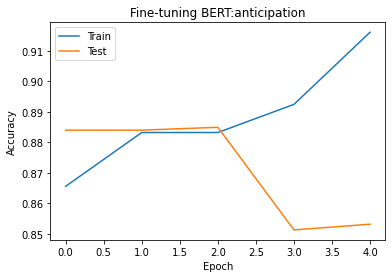

134/134 - 7s - loss: 0.3992 - accuracy: 0.8531 - 7s/epoch - 49ms/step
Evaluacion Modelo Sentimiento: anticipation
score: 0.40
acc: 0.85
85/85 [==============================] - 4s 50ms/step
--------------------TRAINING SENTIMENT: disgust---------------------
Epoch 1/5
312/312 [==============================] - 56s 179ms/step - loss: 0.3773 - accuracy: 0.8395 - val_loss: 0.3527 - val_accuracy: 0.8625
Epoch 2/5
312/312 [==============================] - 55s 176ms/step - loss: 0.2929 - accuracy: 0.8660 - val_loss: 0.3462 - val_accuracy: 0.8513
Epoch 3/5
312/312 [==============================] - 56s 178ms/step - loss: 0.2319 - accuracy: 0.9065 - val_loss: 0.4428 - val_accuracy: 0.8587
Epoch 4/5
312/312 [==============================] - 55s 177ms/step - loss: 0.1832 - accuracy: 0.9282 - val_loss: 0.5076 - val_accuracy: 0.8513
Epoch 5/5
312/312 [==============================] - 55s 178ms/step - loss: 0.1273 - accuracy: 0.9510 - val_loss: 0.5263 - val_accuracy: 0.8391


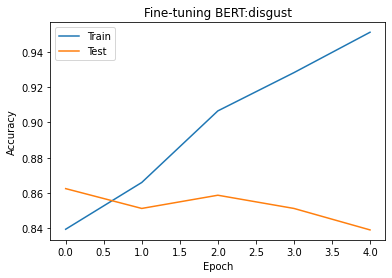

134/134 - 6s - loss: 0.5263 - accuracy: 0.8391 - 6s/epoch - 47ms/step
Evaluacion Modelo Sentimiento: disgust
score: 0.53
acc: 0.84
85/85 [==============================] - 4s 48ms/step
--------------------TRAINING SENTIMENT: fear---------------------
Epoch 1/5
312/312 [==============================] - 55s 176ms/step - loss: 0.3521 - accuracy: 0.8888 - val_loss: 0.3267 - val_accuracy: 0.8990
Epoch 2/5
312/312 [==============================] - 56s 178ms/step - loss: 0.3378 - accuracy: 0.8945 - val_loss: 0.3231 - val_accuracy: 0.8990
Epoch 3/5
312/312 [==============================] - 55s 177ms/step - loss: 0.3254 - accuracy: 0.8953 - val_loss: 0.3125 - val_accuracy: 0.8990
Epoch 4/5
312/312 [==============================] - 55s 177ms/step - loss: 0.2873 - accuracy: 0.9013 - val_loss: 0.3300 - val_accuracy: 0.8887
Epoch 5/5
312/312 [==============================] - 55s 177ms/step - loss: 0.2412 - accuracy: 0.9205 - val_loss: 0.2855 - val_accuracy: 0.9027


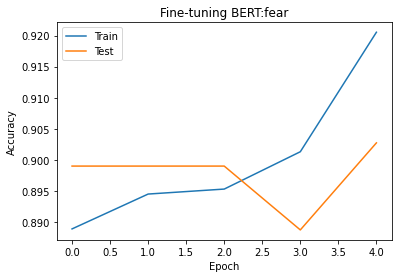

134/134 - 6s - loss: 0.2855 - accuracy: 0.9027 - 6s/epoch - 47ms/step
Evaluacion Modelo Sentimiento: fear
score: 0.29
acc: 0.90
85/85 [==============================] - 4s 48ms/step
--------------------TRAINING SENTIMENT: joy---------------------
Epoch 1/5
312/312 [==============================] - 55s 177ms/step - loss: 0.5262 - accuracy: 0.7516 - val_loss: 0.4548 - val_accuracy: 0.7895
Epoch 2/5
312/312 [==============================] - 55s 178ms/step - loss: 0.3629 - accuracy: 0.8479 - val_loss: 0.4498 - val_accuracy: 0.7998
Epoch 3/5
312/312 [==============================] - 56s 179ms/step - loss: 0.2398 - accuracy: 0.9141 - val_loss: 0.5234 - val_accuracy: 0.7802
Epoch 4/5
312/312 [==============================] - 56s 178ms/step - loss: 0.1689 - accuracy: 0.9438 - val_loss: 0.5358 - val_accuracy: 0.7914
Epoch 5/5
312/312 [==============================] - 55s 177ms/step - loss: 0.1346 - accuracy: 0.9555 - val_loss: 0.7714 - val_accuracy: 0.7465


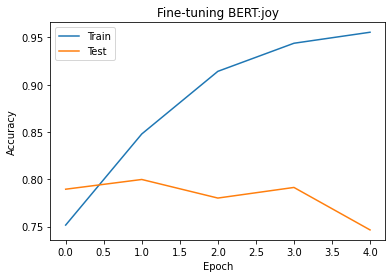

134/134 - 6s - loss: 0.7714 - accuracy: 0.7465 - 6s/epoch - 47ms/step
Evaluacion Modelo Sentimiento: joy
score: 0.77
acc: 0.75
85/85 [==============================] - 4s 48ms/step
--------------------TRAINING SENTIMENT: love---------------------
Epoch 1/5
312/312 [==============================] - 55s 177ms/step - loss: 0.2581 - accuracy: 0.9133 - val_loss: 0.2331 - val_accuracy: 0.9326
Epoch 2/5
312/312 [==============================] - 56s 178ms/step - loss: 0.1866 - accuracy: 0.9298 - val_loss: 0.1962 - val_accuracy: 0.9345
Epoch 3/5
312/312 [==============================] - 56s 179ms/step - loss: 0.1407 - accuracy: 0.9426 - val_loss: 0.1837 - val_accuracy: 0.9439
Epoch 4/5
312/312 [==============================] - 55s 177ms/step - loss: 0.1076 - accuracy: 0.9583 - val_loss: 0.2098 - val_accuracy: 0.9476
Epoch 5/5
312/312 [==============================] - 55s 177ms/step - loss: 0.0763 - accuracy: 0.9735 - val_loss: 0.2837 - val_accuracy: 0.9214


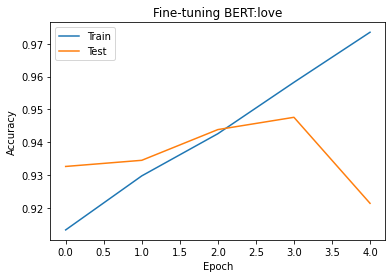

134/134 - 6s - loss: 0.2837 - accuracy: 0.9214 - 6s/epoch - 48ms/step
Evaluacion Modelo Sentimiento: love
score: 0.28
acc: 0.92
85/85 [==============================] - 4s 48ms/step
--------------------TRAINING SENTIMENT: optimism---------------------
Epoch 1/5
312/312 [==============================] - 56s 178ms/step - loss: 0.3214 - accuracy: 0.8880 - val_loss: 0.3272 - val_accuracy: 0.8924
Epoch 2/5
312/312 [==============================] - 2400s 8s/step - loss: 0.2555 - accuracy: 0.8941 - val_loss: 0.3465 - val_accuracy: 0.8924
Epoch 3/5
312/312 [==============================] - 58s 185ms/step - loss: 0.2154 - accuracy: 0.9005 - val_loss: 0.3418 - val_accuracy: 0.8859
Epoch 4/5
312/312 [==============================] - 57s 183ms/step - loss: 0.1742 - accuracy: 0.9173 - val_loss: 0.4292 - val_accuracy: 0.8728
Epoch 5/5
312/312 [==============================] - 57s 183ms/step - loss: 0.1463 - accuracy: 0.9462 - val_loss: 0.4384 - val_accuracy: 0.8307


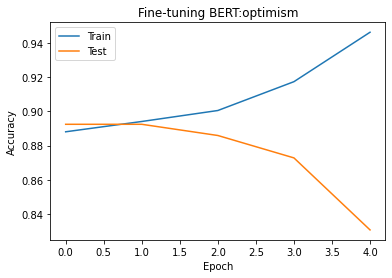

134/134 - 6s - loss: 0.4384 - accuracy: 0.8307 - 6s/epoch - 48ms/step
Evaluacion Modelo Sentimiento: optimism
score: 0.44
acc: 0.83
85/85 [==============================] - 4s 49ms/step
--------------------TRAINING SENTIMENT: pessimism---------------------
Epoch 1/5
312/312 [==============================] - 57s 183ms/step - loss: 0.4435 - accuracy: 0.8343 - val_loss: 0.4317 - val_accuracy: 0.8316
Epoch 2/5
312/312 [==============================] - 57s 183ms/step - loss: 0.4129 - accuracy: 0.8403 - val_loss: 0.4261 - val_accuracy: 0.8316
Epoch 3/5
312/312 [==============================] - 57s 182ms/step - loss: 0.3840 - accuracy: 0.8399 - val_loss: 0.4382 - val_accuracy: 0.8316
Epoch 4/5
312/312 [==============================] - 57s 182ms/step - loss: 0.3349 - accuracy: 0.8511 - val_loss: 0.4678 - val_accuracy: 0.8316
Epoch 5/5
312/312 [==============================] - 58s 185ms/step - loss: 0.2834 - accuracy: 0.8616 - val_loss: 0.4790 - val_accuracy: 0.8307


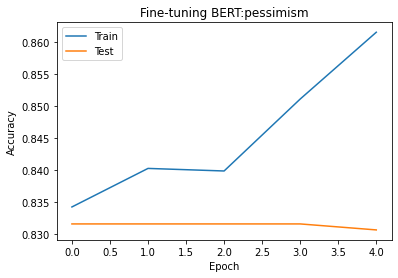

134/134 - 6s - loss: 0.4790 - accuracy: 0.8307 - 6s/epoch - 48ms/step
Evaluacion Modelo Sentimiento: pessimism
score: 0.48
acc: 0.83
85/85 [==============================] - 4s 49ms/step
--------------------TRAINING SENTIMENT: sadness---------------------
Epoch 1/5
312/312 [==============================] - 57s 183ms/step - loss: 0.4846 - accuracy: 0.7705 - val_loss: 0.4736 - val_accuracy: 0.8064
Epoch 2/5
312/312 [==============================] - 57s 183ms/step - loss: 0.3915 - accuracy: 0.8387 - val_loss: 0.4687 - val_accuracy: 0.8307
Epoch 3/5
312/312 [==============================] - 57s 183ms/step - loss: 0.2884 - accuracy: 0.8957 - val_loss: 0.5111 - val_accuracy: 0.8101
Epoch 4/5
312/312 [==============================] - 57s 183ms/step - loss: 0.2323 - accuracy: 0.9205 - val_loss: 0.5539 - val_accuracy: 0.8110
Epoch 5/5
312/312 [==============================] - 57s 183ms/step - loss: 0.1960 - accuracy: 0.9366 - val_loss: 0.5469 - val_accuracy: 0.8148


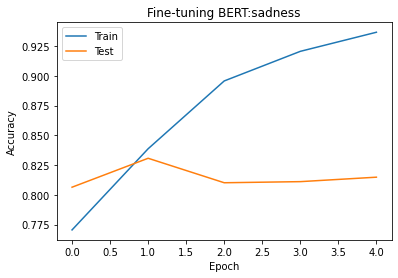

134/134 - 6s - loss: 0.5469 - accuracy: 0.8148 - 6s/epoch - 48ms/step
Evaluacion Modelo Sentimiento: sadness
score: 0.55
acc: 0.81
85/85 [==============================] - 4s 48ms/step
--------------------TRAINING SENTIMENT: surprise---------------------
Epoch 1/5
312/312 [==============================] - 57s 184ms/step - loss: 0.2031 - accuracy: 0.9470 - val_loss: 0.2176 - val_accuracy: 0.9476
Epoch 2/5
312/312 [==============================] - 59s 188ms/step - loss: 0.1863 - accuracy: 0.9547 - val_loss: 0.2134 - val_accuracy: 0.9476
Epoch 3/5
312/312 [==============================] - 60s 191ms/step - loss: 0.1848 - accuracy: 0.9547 - val_loss: 0.2129 - val_accuracy: 0.9476
Epoch 4/5
312/312 [==============================] - 58s 185ms/step - loss: 0.1860 - accuracy: 0.9547 - val_loss: 0.2126 - val_accuracy: 0.9476
Epoch 5/5
312/312 [==============================] - 58s 187ms/step - loss: 0.1807 - accuracy: 0.9547 - val_loss: 0.2066 - val_accuracy: 0.9476


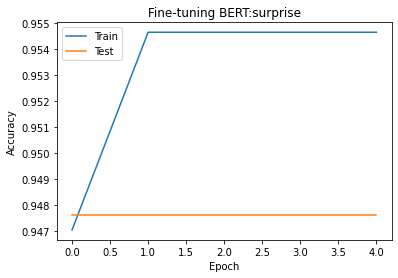

134/134 - 7s - loss: 0.2066 - accuracy: 0.9476 - 7s/epoch - 50ms/step
Evaluacion Modelo Sentimiento: surprise
score: 0.21
acc: 0.95
85/85 [==============================] - 4s 51ms/step
--------------------TRAINING SENTIMENT: trust---------------------
Epoch 1/5
312/312 [==============================] - 60s 193ms/step - loss: 0.1834 - accuracy: 0.9539 - val_loss: 0.2139 - val_accuracy: 0.9439
Epoch 2/5
312/312 [==============================] - 61s 196ms/step - loss: 0.1626 - accuracy: 0.9539 - val_loss: 0.2099 - val_accuracy: 0.9439
Epoch 3/5
312/312 [==============================] - 59s 190ms/step - loss: 0.1422 - accuracy: 0.9526 - val_loss: 0.2237 - val_accuracy: 0.9439
Epoch 4/5
312/312 [==============================] - 58s 185ms/step - loss: 0.1110 - accuracy: 0.9611 - val_loss: 0.2419 - val_accuracy: 0.9411
Epoch 5/5
312/312 [==============================] - 58s 186ms/step - loss: 0.0863 - accuracy: 0.9707 - val_loss: 0.2441 - val_accuracy: 0.9457


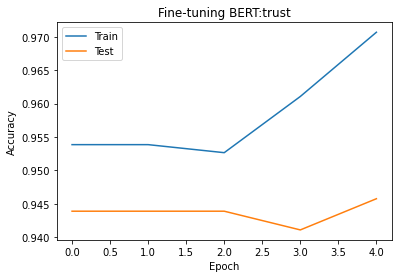

134/134 - 7s - loss: 0.2441 - accuracy: 0.9457 - 7s/epoch - 49ms/step
Evaluacion Modelo Sentimiento: trust
score: 0.24
acc: 0.95
85/85 [==============================] - 5s 55ms/step
finished: in 5649.3135 seconds.


In [7]:
from timeit import default_timer as timer

start = timer()

#main Loop
df_test = pd.read_csv('data/sem_eval_test_blank_es.csv')
tokenizer = BertTokenizer.from_pretrained(nombre_modelo)

EPOCHS = 5

#preparamos el final test
df_test.Tweet = df_test.Tweet.apply(clean_text)
df_test = df_test[df_test['Tweet']!='']

final_predictions = []



for data in sent_list:
    ###PREPARANDO EL DATASET-------------------------------------------------------------
    #limpiamos texto y quitamos tweets que se han quedado vacíos
    df = pd.read_csv("data/df_"+data+".csv")
    
    df.Tweet=df.Tweet.apply(clean_text)
    df = df[df['Tweet']!='']
    #el conjunto de salida es la polaridad, hay que convertir a binario
    #codificamos 'P' como 1 y 'N' se queda como 0
    Y=df.iloc[:,1:]

    #Separamos entrenamiento y test
    #realmente habría que sacar los tokens sólo del conjunto de entrenamiento...
    X_train_tweets, X_test_tweets, Y_train, Y_test = train_test_split(df.Tweet,Y, test_size = 0.3, random_state = 42)
    #print(X_train_tweets.shape,Y_train.shape)
    #print(X_test_tweets.shape,Y_test.shape)

    #preparamos el final test
    df_test.Tweet = df_test.Tweet.apply(clean_text)
    df_test = df_test[df_test['Tweet']!='']
    #print(df_test.Tweet.shape)
    
    ##PREPARAMOS LOS DATOS PARA ENTRADA AL MODELO-----------------------------------------
    #Tokenizamos y codificamos como Dataset

    train_encodings = tokenizer(X_train_tweets.to_list(), truncation=True, padding=True, return_tensors="tf")
    MAX_SEQUENCE_LENGTH=train_encodings['input_ids'].shape[1]
    test_encodings = tokenizer(X_test_tweets.to_list(), truncation=True, padding='max_length', max_length=MAX_SEQUENCE_LENGTH, return_tensors="tf")
    test_final_encondings = tokenizer(df_test.Tweet.to_list(), truncation=True, padding='max_length', max_length=MAX_SEQUENCE_LENGTH, return_tensors="tf")
    
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        Y_train
    ))
    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),
        Y_test
    ))
    
    final_test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_final_encondings),
    ))

    
    ##TRAINING----------------------------------------------------------------------------
    batch_size=8
    
    print("--------------------TRAINING SENTIMENT: "+data+"---------------------")
    history=model.fit(train_dataset.batch(batch_size), epochs=EPOCHS, batch_size=batch_size, validation_data=test_dataset.batch(batch_size))
    
    ##VISUALIZANDO EL ENTRENAMIENTO-------------------------------------------------------
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Fine-tuning BERT:'+data)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    
    ##EVALUACION DEL MODELO -------------------------------------------------------------
    score,acc = model.evaluate(test_dataset.batch(batch_size), verbose = 2, batch_size = batch_size)
    print("Evaluacion Modelo Sentimiento: "+data)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))
    
    ##PREDICTIONS FOR TEST DATASET
    #obtenemos las predicciones del modelo sobre el dataset de test final
    predict=model.predict(final_test_dataset.batch(batch_size))
    
    predict_proba = tf.nn.softmax(predict.logits)
    predict_clases = np.argmax(predict_proba, 1)
    
    final_predictions.append(predict_clases)
  

end= timer()
print(f"finished: in {(end-start):.4f} seconds.")
    

In [8]:
df_final_predictions = pd.DataFrame(np.transpose(final_predictions), columns = sent_list)
df_final_predictions.head(20)

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,1,1,0,0,0,0


In [9]:
df_final_test = pd.concat([df_test['ID'], df_final_predictions], axis = 1)
df_final_test

,ID,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Es-06697,0,0,0,0,0,0,0,0,0,0,0
1,2018-Es-05385,0,1,0,1,0,0,0,0,0,0,0
2,2018-Es-03777,0,0,0,0,1,0,0,0,0,0,0
3,2018-Es-02175,1,0,1,0,1,0,0,0,0,0,0
4,2018-Es-00726,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
674,2018-Es-06551,1,0,0,1,0,0,0,0,0,0,0
675,2018-Es-02782,0,0,0,0,0,0,0,0,0,0,0
676,2018-Es-01308,0,0,0,0,1,0,0,0,0,0,0
677,2018-Es-02136,1,0,0,0,0,0,0,0,0,0,0


In [10]:
df_final_test.anger = [True if x==1 else False for x in df_final_test.anger]
df_final_test.anticipation = [True if x==1 else False for x in df_final_test.anticipation]
df_final_test.disgust = [True if x==1 else False for x in df_final_test.disgust]
df_final_test.fear = [True if x==1 else False for x in df_final_test.fear]
df_final_test.joy = [True if x==1 else False for x in df_final_test.joy]
df_final_test.love = [True if x==1 else False for x in df_final_test.love]
df_final_test.optimism = [True if x==1 else False for x in df_final_test.optimism]
df_final_test.pessimism = [True if x==1 else False for x in df_final_test.pessimism]
df_final_test.sadness = [True if x==1 else False for x in df_final_test.sadness]
df_final_test.surprise = [True if x==1 else False for x in df_final_test.surprise]
df_final_test.trust = [True if x==1 else False for x in df_final_test.trust]

In [11]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 678
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            679 non-null    object
 1   anger         679 non-null    bool  
 2   anticipation  679 non-null    bool  
 3   disgust       679 non-null    bool  
 4   fear          679 non-null    bool  
 5   joy           679 non-null    bool  
 6   love          679 non-null    bool  
 7   optimism      679 non-null    bool  
 8   pessimism     679 non-null    bool  
 9   sadness       679 non-null    bool  
 10  surprise      679 non-null    bool  
 11  trust         679 non-null    bool  
dtypes: bool(11), object(1)
memory usage: 17.9+ KB


In [12]:
!mkdir results

Ya existe el subdirectorio o el archivo results.


In [13]:
df_final_test.to_csv('results/soluciones_mauricio_arancibia_patzi_BERT.csv', index = False)